## Data Preprocessing

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading dataset
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Check missing values in dataset
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Exploratory and Descriptive Analysis

In [ ]:
df.shape

(1338, 7)

In [ ]:
# Summarize dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Statistical summary of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Sampling 10 rows from the data frame
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
489,53,male,31.160,1,no,northwest,10461.97940
1067,39,male,42.655,0,no,northeast,5757.41345
540,34,female,38.000,3,no,southwest,6196.44800
659,57,female,28.785,4,no,northeast,14394.39815
642,61,male,33.915,0,no,northeast,13143.86485
614,20,female,33.000,0,no,southeast,1880.07000
322,34,male,30.800,0,yes,southwest,35491.64000
296,19,male,27.700,0,yes,southwest,16297.84600
717,60,male,24.320,1,no,northwest,13112.60480
255,55,female,25.365,3,no,northeast,13047.33235


In [ ]:
# Checking data types
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
# Unique values in smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Uniquie values in region
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Visualization

Text(0.5, 1.0, 'Distribution Of Sex')

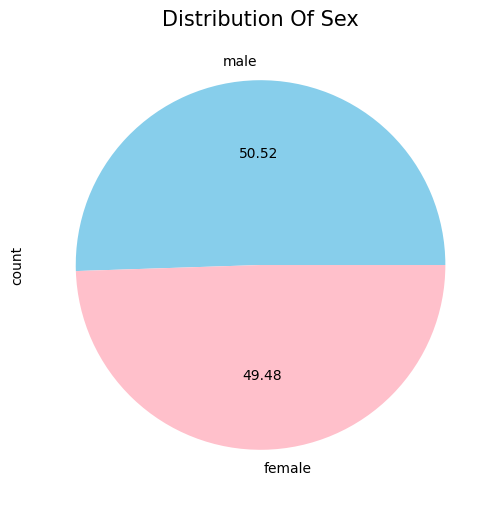

In [ ]:
# Visualizing distrubtion of gender in dataset
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df['sex'].value_counts().plot(kind='pie', colors=['skyblue', 'pink'], autopct='%.2f')
plt.title('Distribution Of Sex', fontsize=15)

Text(0.5, 1.0, 'Distribution Of Smoker')

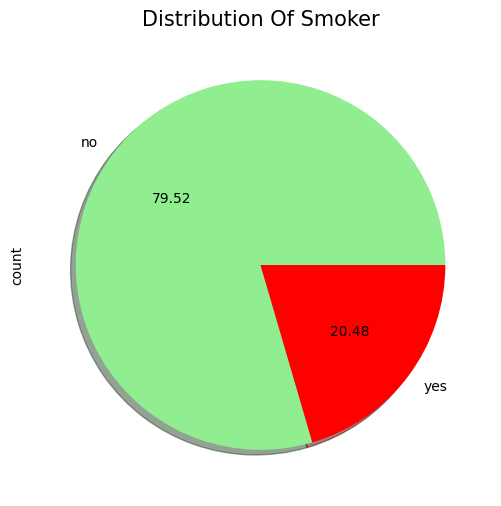

In [ ]:
# Visualizing distrubtion of a smoker in dataset
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df['smoker'].value_counts().plot(kind='pie', colors=['lightgreen', 'red'], shadow=True, autopct='%.2f')
plt.title('Distribution Of Smoker', fontsize=15)

<ipython-input-28-9e6951c6c927>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['region'], palette='mako')


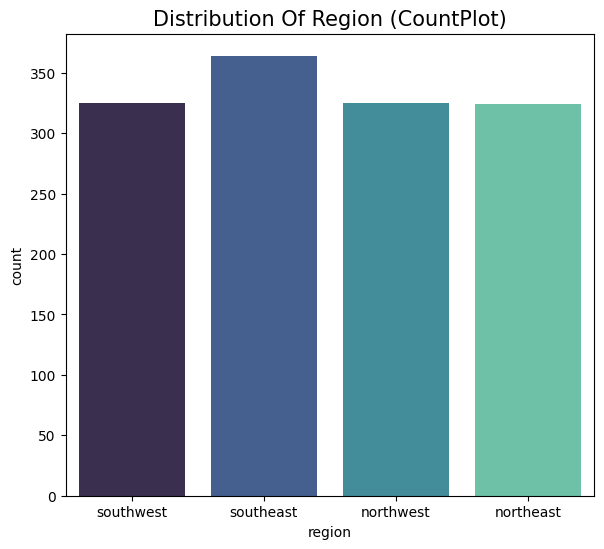

In [ ]:
# Visualizing distrubtion of region in dataset
plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
sns.countplot(x=df['region'], palette='mako')
plt.title('Distribution Of Region (CountPlot)', fontsize=15)
plt.show()

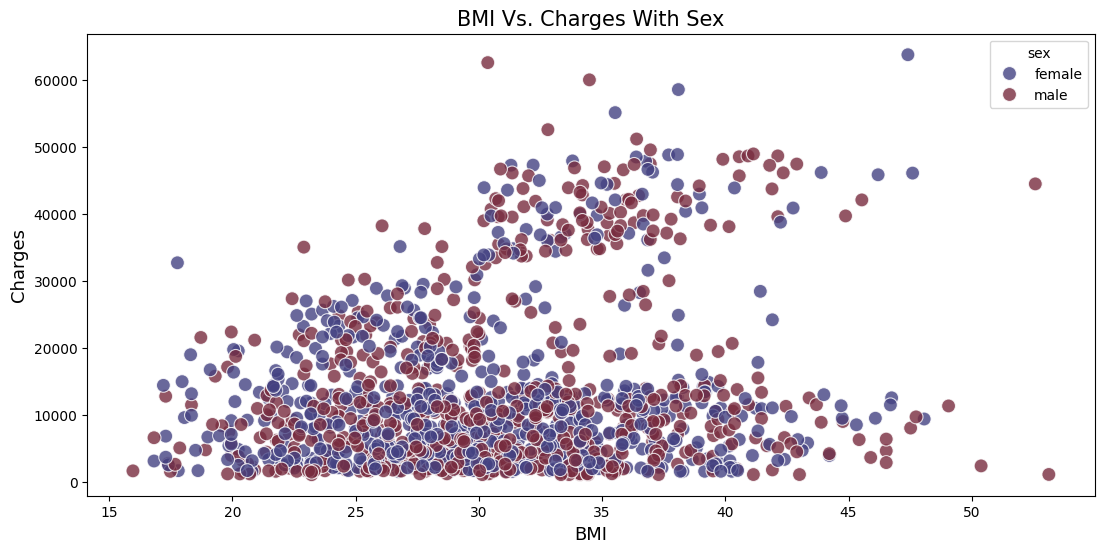

In [ ]:
# Visualization of BMI versus charges with sex
plt.figure(figsize=(13,6))
sns.scatterplot(x=df['bmi'], y=df['charges'],hue=df['sex'], s=100, alpha=0.8, palette='icefire')
plt.title('BMI Vs. Charges With Sex', fontsize=15)
plt.xlabel('BMI', fontsize=13)
plt.ylabel('Charges', fontsize=13)
plt.show()

## Model Building

In [ ]:
# Import library
from sklearn.preprocessing import LabelEncoder

# Label encoding
le  = LabelEncoder()
for i in ['sex', 'smoker', 'region']:
    df[i] = le.fit_transform(df[i])

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

X = df.drop(columns=['smoker'])
y = df['smoker']
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler

# Scaling data
scaler = StandardScaler()
scaler.fit(X_train, X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.01125698, -1.00938988, -0.04436918, -0.89836348,  1.36761169,
        -0.88309693],
       [ 1.05575468, -1.00938988,  0.34406136, -0.89836348, -1.33228592,
        -0.18952542],
       [-0.44104686, -1.00938988,  0.47789037, -0.89836348,  1.36761169,
         1.99848519],
       ...,
       [ 0.27171578, -1.00938988, -0.10965163, -0.08097494,  1.36761169,
        -0.48952464],
       [-0.3697706 , -1.00938988, -0.5013463 , -0.08097494,  1.36761169,
        -0.68476461],
       [-1.51019082, -1.00938988,  0.22002472, -0.89836348, -1.33228592,
        -0.91881819]])

## Evaluation

<ipython-input-42-338f16d144e6>:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(results, labels=[m['Model'] for m in summary], patch_artist=True, showmeans=True)


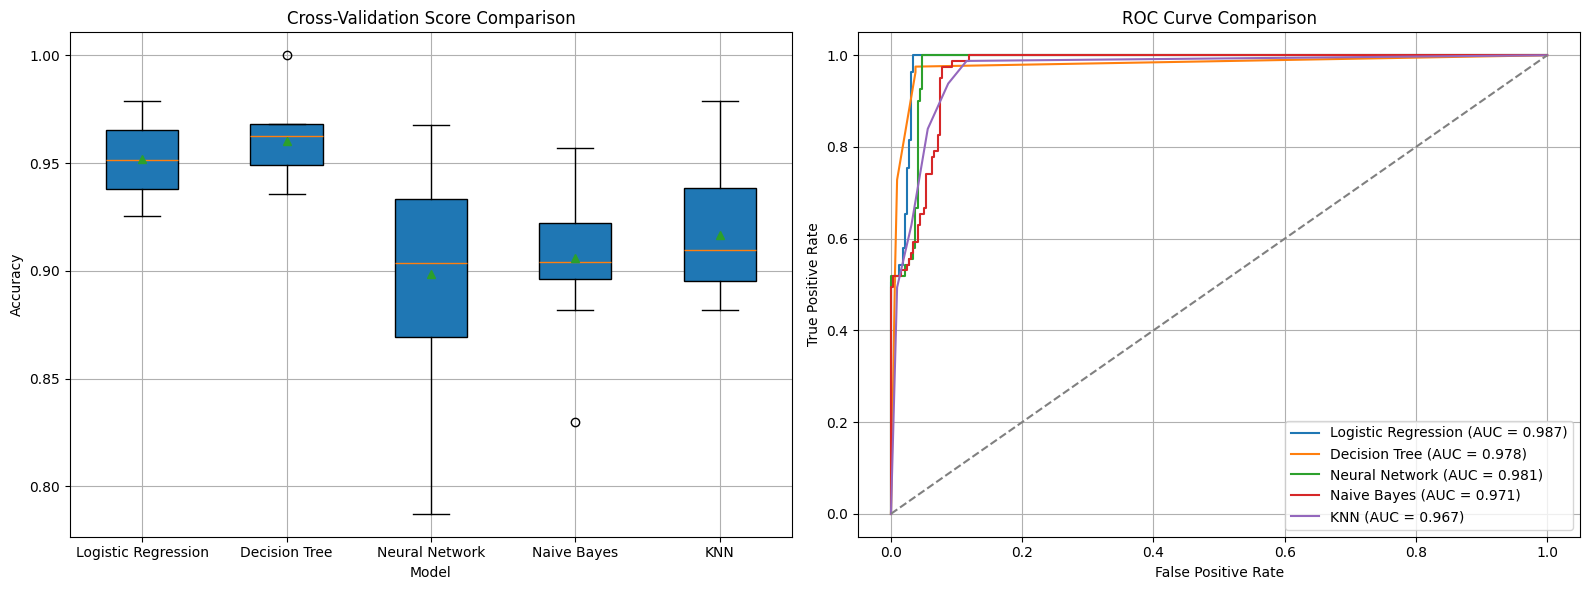

📊 Model Evaluation Summary:

                 Model  Mean CV Score  Std Dev  AUC Score
0  Logistic Regression         0.9519   0.0187     0.9872
1        Decision Tree         0.9604   0.0180     0.9780
2       Neural Network         0.8986   0.0494     0.9810
3          Naive Bayes         0.9060   0.0336     0.9712
4                  KNN         0.9167   0.0298     0.9668


In [ ]:
classification_model_evaluation(X, y)

In [ ]:
def classification_model_evaluation(X, y, score='accuracy'):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Define models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(max_depth=4, min_samples_leaf=5),
        'Neural Network': MLPClassifier(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier()
    }

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    results = []
    roc_data = []
    summary = []

    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring=score)
        mean_score = np.mean(cv_scores)
        std_score = np.std(cv_scores)

        model.fit(X_train, y_train)
        try:
            y_proba = model.predict_proba(X_test)[:, 1]
        except:
            y_proba = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)

        results.append(cv_scores)
        roc_data.append((fpr, tpr, auc_score))
        summary.append({
            'Model': name,
            'Mean CV Score': round(mean_score, 4),
            'Std Dev': round(std_score, 4),
            'AUC Score': round(auc_score, 4)
        })

    # Setup subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Boxplot for cross-validation results
    axes[0].boxplot(results, labels=[m['Model'] for m in summary], patch_artist=True, showmeans=True)
    axes[0].set_title('Cross-Validation Score Comparison')
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel(score.capitalize())
    axes[0].grid(True)

    # ROC curve plot
    for i, (fpr, tpr, auc_score) in enumerate(roc_data):
        label = f"{summary[i]['Model']} (AUC = {auc_score:.3f})"
        axes[1].plot(fpr, tpr, label=label)
    axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axes[1].set_title("ROC Curve Comparison")
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].legend(loc='lower right')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

    # Display summary
    summary_df = pd.DataFrame(summary)
    print("📊 Model Evaluation Summary:\n")
    print(summary_df)

In [ ]:
!jupyter nbconvert "/content/Luis_Perez_FinalProject.ipynb" --to html

[NbConvertApp] Converting notebook /content/Luis_Perez_FinalProject.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 1217295 bytes to /content/Luis_Perez_FinalProject.html
